In [ ]:
# VISUALIZATION NOTEBOOK

# This notebook runs only the visualization of the results of a simulation for the Solar 
# Dynamo model with the sABC algorithm. The results of the simulation, as well as the parameters 
# used for the simulated data and the simulation itself are all stored in files in the directory 
# synthetic_data_sim/synthetic$i, and they are produced by the "synthetic.ipynb" notebook.

# NB: The first thing to choose is which simulation to visualize; then it is all automatically done.
# There's no need to modify things, we can simply run the whole code so we know all the parameters
# used and all the graphs that we could be interested in.

# GG EZ - kallo27

In [2]:
# MODEL AND MANAGING FUNCTIONS FILES

include("../src/SDDESolarDynamo.jl")
include("../src/VisualizationTools.jl")
include("../src/DirUtils.jl")

using .SDDESolarDynamo
using .VisualizationTools
using .DirUtils

In [3]:
# CHOICE OF THE DIRECTORY TO LOAD AND PLOT

# Current directory
initial_dir = pwd()

# Going into "synthetic_data_sim/synthetic$x"
x = 3
switch_dir("synthetic", x)
current_dir = pwd()

# NB: don't run this cell again! First go back to the initial directory!
# if pwd() != initial_dir
#     cd("./../../examples")
# end

Moved to: /mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3


"/mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3"

In [4]:
# LOADING OF SIMULATED DATA PARAMETERS

sim_param = load_param_sim_data()

Row,Parameter,Value
,String7,String15
1,N,6.2
2,T,3.1
3,tau,3.5
4,sigma,0.04
5,B_max,6.0
6,tspan,"[971, 1899]"
7,dt,0.1


In [5]:
# LOADING OF NEEDED DATA

# Solution of the SDDE
t, u, du = load_solution()

# Simulation parameters
param_sim = load_param_sim()

Row,Parameter,Value
,String15,String
1,prior,"product_distribution(Uniform(1.0, 15.0), Uniform(0.1, 15.0), Uniform(0.1, 6.0), Uniform(0.01, 0.3), Uniform(1.0, 15.0))"
2,n_particles,1000
3,n_simulation,5000
4,v,1.0
5,type,1
6,indices,1:5:116


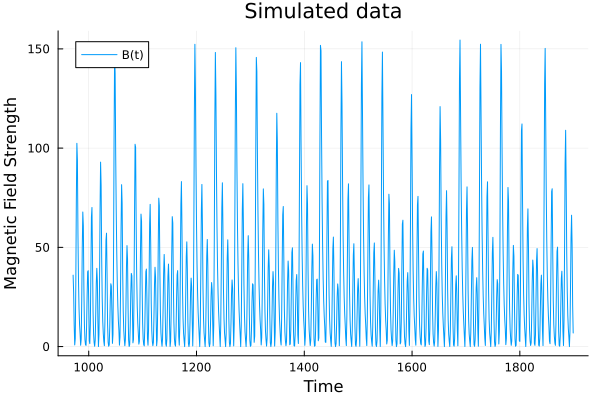

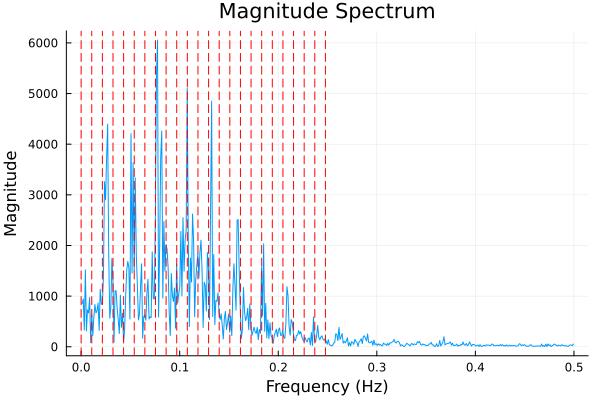

In [6]:
# VISUALIZATION OF SYNTHETIC DATA

# Extract indices
indices_string = param_sim[param_sim.Parameter .== "indices", :][1, 2]
indices = Meta.parse(indices_string) |> eval

# Fourier spectrum
plot_data(t, u.^2)
plot_fourier_spectrum(t, u.^2, indices; save=false)

Data loaded from file: /mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3/eps_hist.csv
Data loaded from file: /mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3/u_hist.csv
Data loaded from file: /mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3/rho_hist.csv
Posterior parameters loaded from file: /mnt/c/Users/Utente/SDDESolarDynamo.jl/examples/synthetic_data_sim/synthetic3/pop.csv


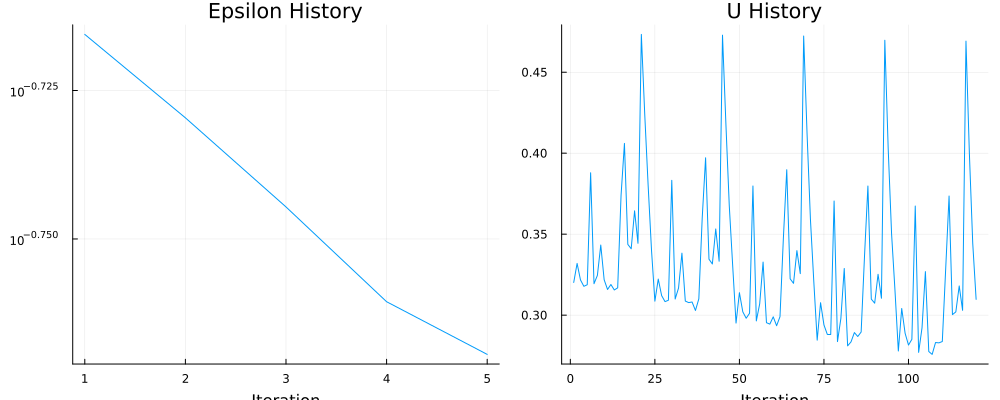

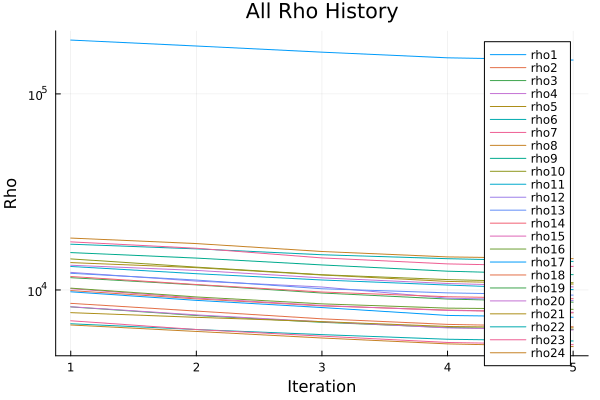

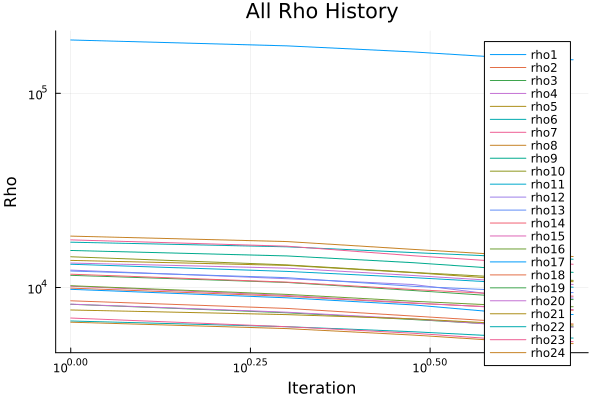

In [7]:
# LOADING AND PLOTTING OF SIMULATION RESULTS AND BEHAVIOUR

# Results loading 
eps_hist, u_hist, rho_hist, posterior_params = load_result()

# Epsilon, u and rho behaviour
u_eps_plot(eps_hist, u_hist)
rho_plot(rho_hist, style = "together")
rho_history(rho_hist)

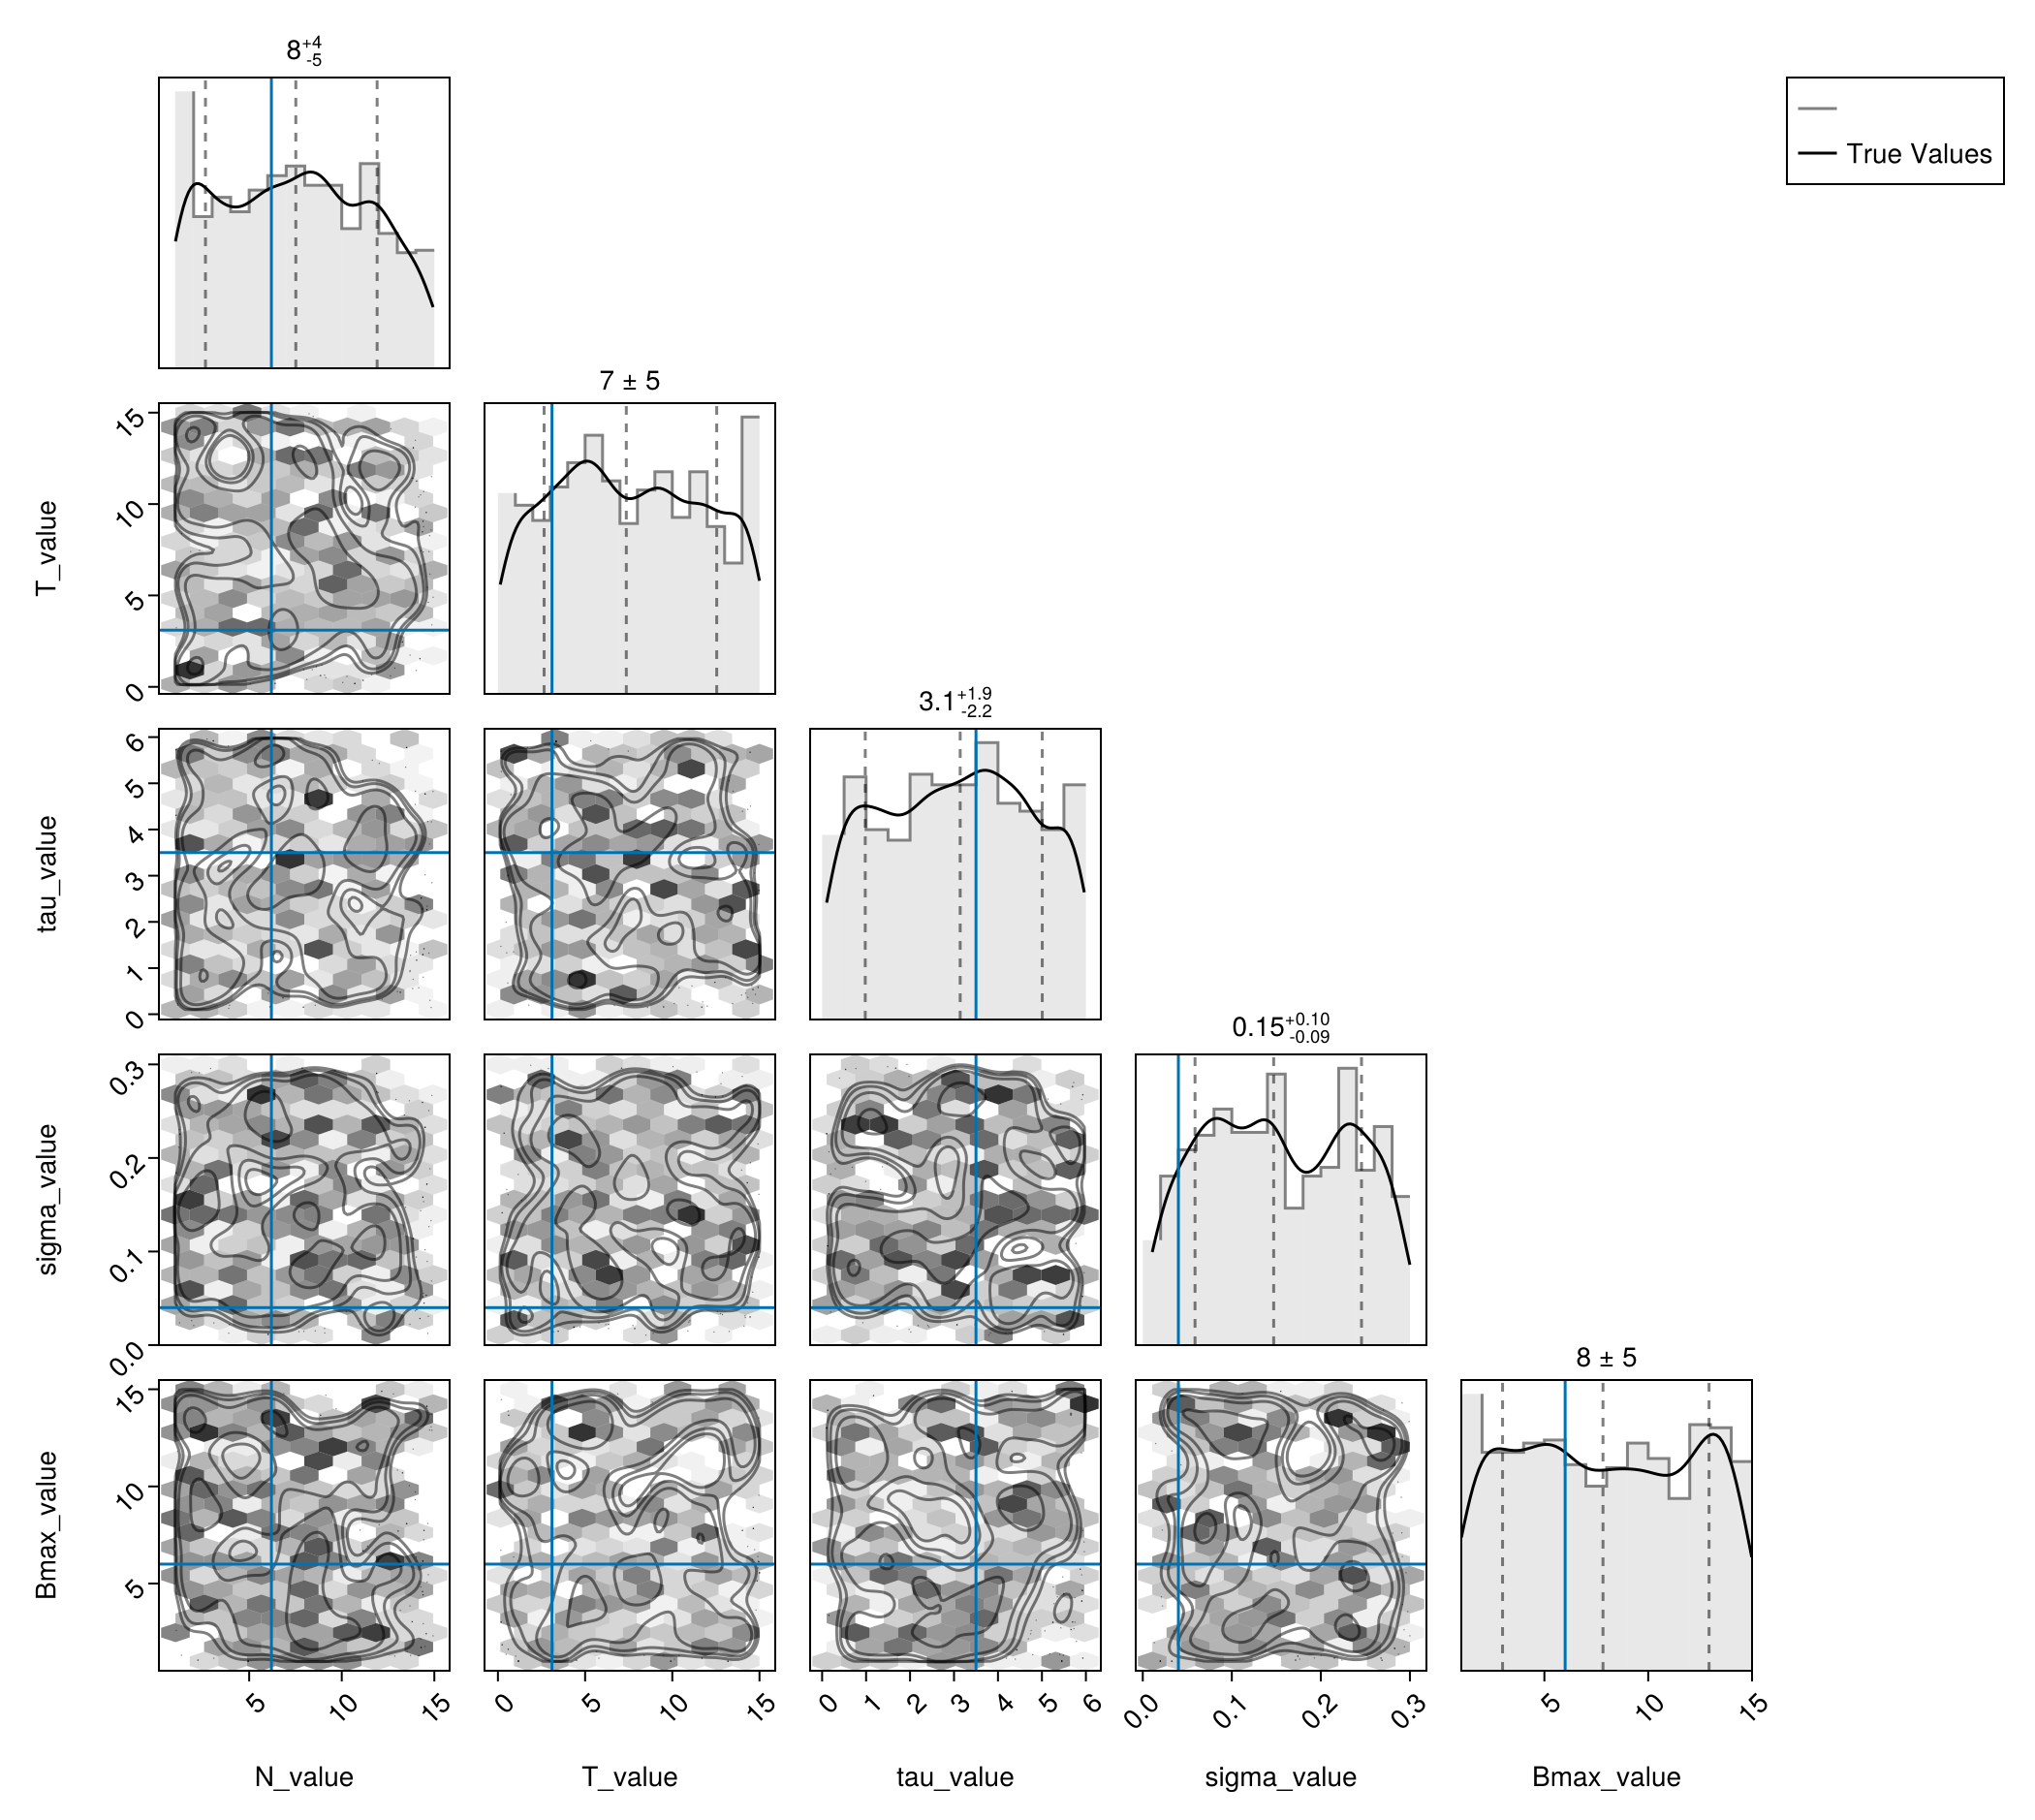

CairoMakie.Screen{IMAGE}


In [8]:
# POSTERIORS PLOTTING

# Retrieving the "true" params used for the simulated data
true_values = [parse(Float64, val) for val in sim_param[1:5, 2]]

# Corner plot
post_plotting_sim(posterior_params, true_values)

In [9]:
# DIRECTORY MANAGING

# Go back to the initial directory if not already there
if pwd() != initial_dir
    cd("./../../../examples")
end

pwd()

"/mnt/c/Users/Utente/SDDESolarDynamo.jl/examples"